## Objective:

**The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights,
identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations,
and data manipulation techniques to explore the dataset comprehensively.**


## Importing necessary packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset using Pandas package read_csv to read csv files.**

In [6]:
df = pd.read_csv('Cardiotocographic.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


Below is the list of columns explaining it's abbrevation forms:

1.	LB - Likely stands for "Baseline Fetal Heart Rate (FHR)" which represents the average fetal heart rate over a period.
2.	AC - Could represent "Accelerations" in the FHR. Accelerations are usually a sign of fetal well-being.
3.	FM - May indicate "Fetal Movements" detected by the monitor.
4.	UC - Likely denotes "Uterine Contractions", which can impact the FHR pattern.
5.	DL - Could stand for "Decelerations Late" with respect to uterine contractions, which can be a sign of fetal distress.
6.	DS - May represent "Decelerations Short" or decelerations of brief duration.
7.	DP - Could indicate "Decelerations Prolonged", or long-lasting decelerations.
8.	ASTV - Might refer to "Percentage of Time with Abnormal Short Term Variability" in the FHR.
9.	MSTV - Likely stands for "Mean Value of Short Term Variability" in the FHR.
10.	ALTV - Could represent "Percentage of Time with Abnormal Long Term Variability" in the FHR.
11.	MLTV - Might indicate "Mean Value of Long Term Varin the FHR. the FHR.


# A. Data Cleaning and Preparation:

## 1. Information about the Data

In [9]:
df.info()
# Information about Columns, datatypes, rows, null/non-null values
# This shows there are total of 2126 rows with null values in a few columns
# Datatype of each column is numeric (specifically float datatype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [10]:
# Shape of the data

df.shape # Rows = 2126, Columns = 14

(2126, 14)

In [11]:
# Displaying all the columns in the data

df.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [12]:
# Showing descriptive stats of the data

df.describe()
# As per the stats, total count of rows is 2126, however; for few columns it differs due to null values
# If you check column LB(Baseline FHR) - More than 75% of it's data is below 140 indicating the max value (214) could be an outlier.

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


## 2. Missing Values in the Data

In [14]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


**Detecting Missing Values**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [17]:
# Finding null values in the columns
# Columns such as LB, DS, DP, MLTV, Width, Tendency, and NSP have 21 missing values each.
df.isnull().sum() # Column AC has 20 missing values

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

<Axes: >

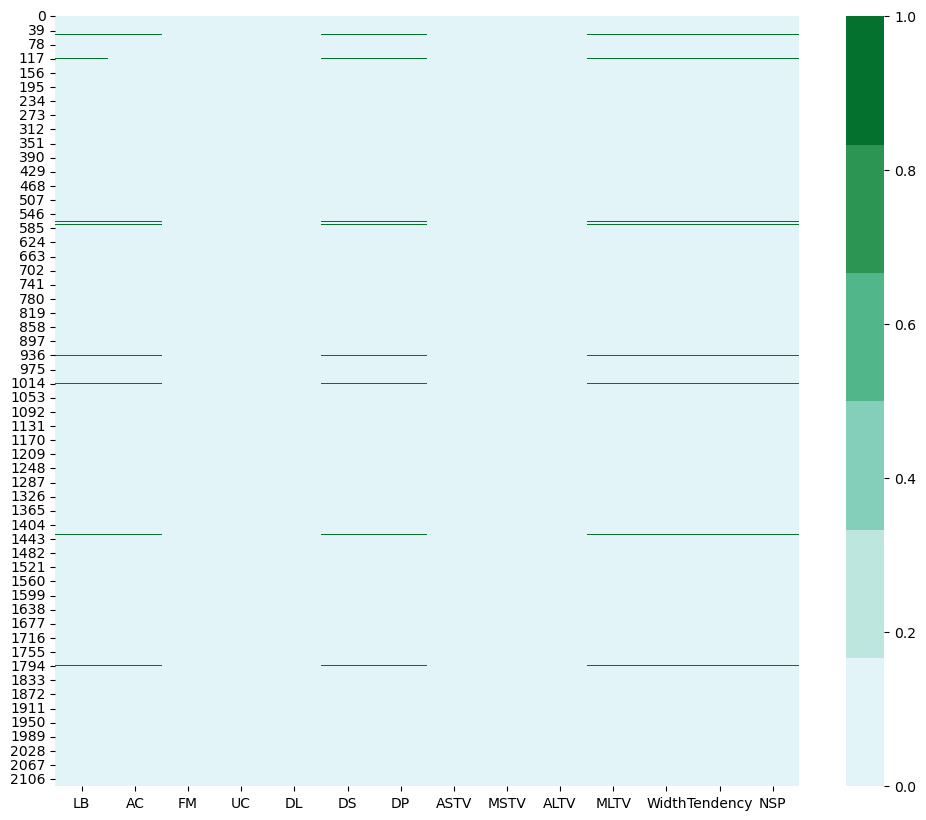

In [18]:
# Customized heatmap to preferred color palette using Seaborn itself and set figure size using matplotlib
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(),cmap = sns.color_palette(palette='BuGn'))

In [19]:
# Non Null count of columns
df.notnull().sum()

LB          2105
AC          2106
FM          2126
UC          2126
DL          2126
DS          2105
DP          2105
ASTV        2126
MSTV        2126
ALTV        2126
MLTV        2105
Width       2105
Tendency    2105
NSP         2105
dtype: int64

**Treating Missing Values**

In [21]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [22]:
# Will treat the missing values by replacing null values with mean of it's own columns

In [27]:
# Let's check Mean values for all columns

# Define the function 'means' with parameters 'data' (a DataFrame) and 'columns' (a list of column names)
def means(data, columns):
    values = []  # Initialize an empty list to store column names and their means
    
    # Iterate over each column name in the 'columns' list
    for col in columns:
        mean = data[col].mean()  # Calculate the mean of the column
        values.append([col, mean])  # Append the column name and its mean value to the 'values' list
    
    # Create a new DataFrame with two columns: 'Column' and 'Mean'
    mean_values = pd.DataFrame(values, columns=['Column', 'Mean'])

    return mean_values  # Return the resulting DataFrame with column means

In [29]:
# Calling the function to calculate mean values for all column
mean_values = means(df,df.columns)
# Print Results
print(mean_values)

      Column        Mean
0         LB  133.343598
1         AC    0.003219
2         FM    0.009894
3         UC    0.004391
4         DL    0.001895
5         DS    0.000003
6         DP    0.000175
7       ASTV   46.995984
8       MSTV    1.364378
9       ALTV   10.285964
10      MLTV    8.284887
11     Width   70.429260
12  Tendency    0.316371
13       NSP    1.304507


In [31]:
# Define the function 'fillfunc' with parameters 'data' (a DataFrame) and 'columns' (a list of column names)
def fillfunc(data, columns):
    # Iterate over each column name in the 'columns' list
    for col in columns:
        # Check if there are any missing (null) values in the column
        if data[col].isnull().any():
            # Calculate the mean of the column to fill missing values
            mean_value = data[col].mean()
            # Fill missing values in the column with the calculated mean
            data[col] = data[col].fillna(mean_value)

    return data  # Return the modified DataFrame with filled missing values

In [35]:
fillfunc(df,df.columns)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [37]:
# All null values are treated with mean values and datatype is correct as numeric(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [39]:
# These shows two rows, however; not all values of all columns are same so do not drop such columns
# as some columns can contain necessary information
df[df.duplicated()]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


## 3. Outliers

**There are two ways we can Detect Outliers in a dataset**

**1. Statistical Methods**

**2. Visualization(Boxplot & Histogram)**

### Detect Outliers

In [47]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [107]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
print(f'Values of Q1 for all columns:\n{Q1}')
print(f'Values of Q3 for all columns:\n{Q3}')

Values of Q1 for all columns:
LB          126.000000
AC            0.000000
FM            0.000000
UC            0.001851
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         32.000000
MSTV          0.700000
ALTV          0.000000
MLTV          4.600000
Width        37.000000
Tendency      0.000000
NSP           1.000000
Name: 0.25, dtype: float64
Values of Q3 for all columns:
LB          140.000000
AC            0.005606
FM            0.002567
UC            0.006536
DL            0.003289
DS            0.000000
DP            0.000000
ASTV         61.000000
MSTV          1.700000
ALTV         11.000000
MLTV         10.800000
Width       100.000000
Tendency      1.000000
NSP           1.000000
Name: 0.75, dtype: float64


**This way we will have to calculate each column one by one and it's time consuming, so we will create a function to automate it**

In [62]:
def quartile(data,column):                             # Creating a function to ease the calculations for all Numerical columns
    Interquartilerange = {}                            # Empty Dictionary to add the results into
    
    for col in column:                                 # Using a for loop to iterate through each column in the dataset
        Q1 = data[col].quantile(0.25)                  # Finding the Quartile Ranges
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1                                  # Calculating IQR
        Upper_Outlier = data[col][data[col] > Q3 + 1.5*IQR].values      # Hard Coded Outlier Calculation and converted to values(as output in bool)
        Lower_Outlier = data[col][data[col] < Q1 - 1.5*IQR].values

        # Using the dictionary to add the outputs and converting outlier values into list
        
        Interquartilerange[col] = {'Q1':Q1,
                             'Q3':Q3,
                             'IQR':IQR,
                             'Upper_Outlier':Upper_Outlier.tolist(),
                             'Lower_Outlier':Lower_Outlier.tolist()}

    IQRange = pd.DataFrame(Interquartilerange).T        # Converted the entire result of the code into DataFrame for easy readability and understanding

    return IQRange                                      # Returned the Result

In [66]:
# As Values for outliers are alot and bigger , we can set display options to maximum for better readability and viewing via pandas
pd.set_option('display.max_colwidth', None)  # Don't truncate column content
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', 1000)        # Expand width for better readability

In [68]:
quartile(df,df.columns)

,Q1,Q3,IQR,Upper_Outlier,Lower_Outlier
LB,126.0,140.0,14.0,"[214.0, 214.0, 214.0, 214.0, 214.0, 214.0]","[52.0, 52.0, 51.84248683343552, 52.18854680260237]"
AC,0.0,0.005606,0.005606,"[0.038567494, 0.014705882, 0.014230272, 0.038567494, 0.017241379, 0.014178482, 0.0155521, 0.015258216, 0.014178482, 0.014725569, 0.01501251, 0.014064698, 0.019283747, 0.0155902, 0.016423358, 0.015781923, 0.014806378, 0.038567494, 0.017391304, 0.014023732, 0.014906832, 0.014302741, 0.015642458, 0.017667845, 0.01734104, 0.038567494, 0.017857143, 0.014319809, 0.01511335, 0.0144, 0.014067995, 0.015906681, 0.017073171, 0.015165877, 0.014444444, 0.016, 0.014842301, 0.038567494, 0.038567494]","[-0.019283747, -0.019283747, -0.019283747, -0.019283747]"
FM,0.0,0.002567,0.002567,"[0.072335025, 0.222390318, 0.407839867, 0.380222841, 0.441400304, 0.382621951, 0.450924609, 0.469250211, 0.340044743, 0.425, 0.3351206643755181, 0.135112594, 0.098784195, 0.107589658, 0.111898017, 0.088642659, 0.102585488, 0.084977238, 0.109090909, 0.079232694, 0.064918851, 0.05465587, 0.057547957, 0.047040971, 0.037936267, 0.011583012, 0.017994859, 0.020143885, 0.008912656, 0.009771987, 0.007668712, 0.007211538, 0.008403361, 0.0299169230015415, 0.025873221, 0.107061503, 0.009111617, 0.006535948, 0.008340284, 0.012519562, 0.015822785, 0.029190992, 0.049792531, 0.053140097, 0.057529611, 0.008658009, 0.010989011, 0.007506255, 0.007032349, 0.007246377, 0.013344454, 0.012704174, 0.016393443, 0.007707129, 0.014814815, 0.007556675, 0.01026694, 0.022284123, 0.026315789, 0.015151515, 0.006968641, 0.01501251, 0.009584665, 0.00990099, 0.021052632, 0.007506255, 0.015846539, 0.017716535, 0.012793177, 0.016759777, 0.015625, 0.018907563, 0.008, 0.008908686, 0.006672227, 0.00867052, 0.009975384, 0.009163803, 0.008340284, 0.008561644, 0.010135135, 0.006525285, 0.009070295, 0.012552301, 0.013344454, 0.018255578, 0.01501251, 0.012091898, 0.019117647, 0.025104603, 0.011676397, 0.006493506, 0.020408163, 0.018348624, 0.020249221, 0.020618557, 0.020249221, 0.006972112, 0.006726457, 0.014178482, ...]","[-0.480633803, -0.480633803, -0.480633803, -0.480633803, -0.480633803, -0.480633803, -0.005105536]"
UC,0.001851,0.006536,0.004685,"[0.029850746, 0.029850746, 0.029850746, 0.014925373, 0.029935908, 0.029850746, 0.0300018264803428, 0.013861386, 0.014373717]","[-0.014925373, -0.014925373, -0.014925373, -0.014925373]"
DL,0.0,0.003289,0.003289,"[0.009443861, 0.008415147, 0.008340284, 0.012158055, 0.01000834, 0.014164306, 0.00963698, 0.008498584, 0.008298755, 0.011544012, 0.015384615, 0.03076923, 0.03062062, 0.03076923, 0.013850416, 0.010628019, 0.013623978, 0.011658031, 0.009334889, 0.01076716, 0.03076923, 0.01, 0.009202454, 0.00887574, 0.008760951, 0.008316008, 0.010893246, 0.012315271, 0.011441648, 0.008474576, 0.00921659, 0.010638298, 0.008241758, 0.00877193, 0.00944206, 0.011449842, 0.014150943, 0.014742015, 0.008247423, 0.010504202, 0.012594458, 0.0089251, 0.008629518, 0.009174312, 0.00896861, 0.008474576, 0.008714597, 0.008438819, 0.012248469, 0.012373453, 0.012631579, 0.01119403, 0.01352657, 0.008532423, 0.008290155, 0.009268433, 0.010349288, 0.009358289, 0.012276786, 0.013064133, 0.01179941, 0.010575793, 0.008653846, 0.009623797, 0.008342023, 0.010166359, 0.008908686, 0.009406806, 0.009469697, 0.008712488, 0.014681892, 0.01042654, 0.011316872, 0.011778563, 0.010297483, 0.009443839, 0.008254717, 0.008454106, 0.009155646, 0.008464329, 0.008805031, 0.010463378, 0.013605442, 0.010638298, 0.013035382, 0.011811024, 0.0118368191337055, 0.014373717, 0.013400335, 0.013138686, 0.010457516, 0.009287926, 0.008474576, 0.008708273, 0.008403361, 0.008948772, 0.008705114, 0.009287926, 0.009043928, 0.009433962, ...]","[-0.015384615, -0.015384615, -0.015384615, -0.015393469, -0.015384615, -0.015384615]"
DS,0.0,0.0,0.0,"[3.667736079317775e-06, 2.5089835057102827e-06, 2.542969274806832e-06, 2.5089835057102827e-06, 2.5089835057102827e-06, 8.656021213687698e-07, 1.1654462108055476e-06, 5.577852468985418e-07, 2.508983505710282

In [70]:
# Stored the outlier values in an object

Outliers = quartile(df,df.columns)
Outliers = Outliers[['Upper_Outlier','Lower_Outlier']]
Outliers

,Upper_Outlier,Lower_Outlier
LB,"[214.0, 214.0, 214.0, 214.0, 214.0, 214.0]","[52.0, 52.0, 51.84248683343552, 52.18854680260237]"
AC,"[0.038567494, 0.014705882, 0.014230272, 0.038567494, 0.017241379, 0.014178482, 0.0155521, 0.015258216, 0.014178482, 0.014725569, 0.01501251, 0.014064698, 0.019283747, 0.0155902, 0.016423358, 0.015781923, 0.014806378, 0.038567494, 0.017391304, 0.014023732, 0.014906832, 0.014302741, 0.015642458, 0.017667845, 0.01734104, 0.038567494, 0.017857143, 0.014319809, 0.01511335, 0.0144, 0.014067995, 0.015906681, 0.017073171, 0.015165877, 0.014444444, 0.016, 0.014842301, 0.038567494, 0.038567494]","[-0.019283747, -0.019283747, -0.019283747, -0.019283747]"
FM,"[0.072335025, 0.222390318, 0.407839867, 0.380222841, 0.441400304, 0.382621951, 0.450924609, 0.469250211, 0.340044743, 0.425, 0.3351206643755181, 0.135112594, 0.098784195, 0.107589658, 0.111898017, 0.088642659, 0.102585488, 0.084977238, 0.109090909, 0.079232694, 0.064918851, 0.05465587, 0.057547957, 0.047040971, 0.037936267, 0.011583012, 0.017994859, 0.020143885, 0.008912656, 0.009771987, 0.007668712, 0.007211538, 0.008403361, 0.0299169230015415, 0.025873221, 0.107061503, 0.009111617, 0.006535948, 0.008340284, 0.012519562, 0.015822785, 0.029190992, 0.049792531, 0.053140097, 0.057529611, 0.008658009, 0.010989011, 0.007506255, 0.007032349, 0.007246377, 0.013344454, 0.012704174, 0.016393443, 0.007707129, 0.014814815, 0.007556675, 0.01026694, 0.022284123, 0.026315789, 0.015151515, 0.006968641, 0.01501251, 0.009584665, 0.00990099, 0.021052632, 0.007506255, 0.015846539, 0.017716535, 0.012793177, 0.016759777, 0.015625, 0.018907563, 0.008, 0.008908686, 0.006672227, 0.00867052, 0.009975384, 0.009163803, 0.008340284, 0.008561644, 0.010135135, 0.006525285, 0.009070295, 0.012552301, 0.013344454, 0.018255578, 0.01501251, 0.012091898, 0.019117647, 0.025104603, 0.011676397, 0.006493506, 0.020408163, 0.018348624, 0.020249221, 0.020618557, 0.020249221, 0.006972112, 0.006726457, 0.014178482, ...]","[-0.480633803, -0.480633803, -0.480633803, -0.480633803, -0.480633803, -0.480633803, -0.005105536]"
UC,"[0.029850746, 0.029850746, 0.029850746, 0.014925373, 0.029935908, 0.029850746, 0.0300018264803428, 0.013861386, 0.014373717]","[-0.014925373, -0.014925373, -0.014925373, -0.014925373]"
DL,"[0.009443861, 0.008415147, 0.008340284, 0.012158055, 0.01000834, 0.014164306, 0.00963698, 0.008498584, 0.008298755, 0.011544012, 0.015384615, 0.03076923, 0.03062062, 0.03076923, 0.013850416, 0.010628019, 0.013623978, 0.011658031, 0.009334889, 0.01076716, 0.03076923, 0.01, 0.009202454, 0.00887574, 0.008760951, 0.008316008, 0.010893246, 0.012315271, 0.011441648, 0.008474576, 0.00921659, 0.010638298, 0.008241758, 0.00877193, 0.00944206, 0.011449842, 0.014150943, 0.014742015, 0.008247423, 0.010504202, 0.012594458, 0.0089251, 0.008629518, 0.009174312, 0.00896861, 0.008474576, 0.008714597, 0.008438819, 0.012248469, 0.012373453, 0.012631579, 0.01119403, 0.01352657, 0.008532423, 0.008290155, 0.009268433, 0.010349288, 0.009358289, 0.012276786, 0.013064133, 0.01179941, 0.010575793, 0.008653846, 0.009623797, 0.008342023, 0.010166359, 0.008908686, 0.009406806, 0.009469697, 0.008712488, 0.014681892, 0.01042654, 0.011316872, 0.011778563, 0.010297483, 0.009443839, 0.008254717, 0.008454106, 0.009155646, 0.008464329, 0.008805031, 0.010463378, 0.013605442, 0.010638298, 0.013035382, 0.011811024, 0.0118368191337055, 0.014373717, 0.013400335, 0.013138686, 0.010457516, 0.009287926, 0.008474576, 0.008708273, 0.008403361, 0.008948772, 0.008705114, 0.009287926, 0.009043928, 0.009433962, ...]","[-0.015384615, -0.015384615, -0.015384615, -0.015393469, -0.015384615, -0.015384615]"
DS,"[3.667736079317775e-06, 2.5089835057102827e-06, 2.542969274806832e-06, 2.5089835057102827e-06, 2.5089835057102827e-06, 8.656021213687698e-07, 1.1654462108055476e-06, 5.577852468985418e-07, 2.5089835057102827e-06, 6.323448227872172e-06, 3.214846197105425e-06, 3.4792709477754668e-06, 1.0485738949577331e-06, 0.00270636, 1.3928578317829376e

**Since we have detected outliers in all the columns of the dataset, treating these outliers is crucial, as they can cause data inconsistency and instability, leading to reduced model accuracy and poor performance.**

### Treat Outliers

In [117]:
# Calculate the 25th percentile (Q1) for each column in the DataFrame
Q1 = df.quantile(0.25)

# Calculate the 75th percentile (Q3) for each column in the DataFrame
Q3 = df.quantile(0.75)

# Calculate the Interquartile Range (IQR), which is the difference between Q3 and Q1
IQR = Q3 - Q1

# Filter the DataFrame to remove rows that contain outliers.
# Outliers are identified as values that are either below (Q1 - 1.5 * IQR) or above (Q3 + 1.5 * IQR)
# The condition inside `~` checks for rows that have outliers, and the tilde (~) negates that condition 
# to keep rows that do not have outliers.

df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [119]:
df_no_outliers

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1,132.000000,0.006380,0.000000,0.006380,3.189793e-03,0.0,0.0,17.000000,2.100000,0.000000,10.400000,130.000000,0.000000,1.0
2,133.000000,0.003322,0.000000,0.008306,3.322259e-03,0.0,0.0,16.000000,2.100000,0.000000,13.400000,130.000000,0.000000,1.0
4,131.948232,0.006515,0.000000,0.008143,0.000000e+00,0.0,0.0,16.000000,2.400000,0.000000,19.900000,117.000000,1.000000,1.0
37,114.000000,0.004559,0.000000,0.004559,3.039514e-03,0.0,0.0,24.000000,3.200000,0.000000,16.200000,134.000000,0.000000,1.0
59,144.000000,0.008143,0.000000,0.006595,0.000000e+00,0.0,0.0,33.000000,1.100000,-0.060411,6.200000,100.000000,1.000000,1.0
61,146.000000,0.004580,-0.001776,0.004580,0.000000e+00,0.0,0.0,39.000000,0.800000,21.000000,5.200000,28.000000,0.000000,1.0
62,142.000000,0.000000,0.000000,0.003311,0.000000e+00,0.0,0.0,25.000000,1.300000,0.000000,11.600000,26.000000,0.008281,1.0
63,136.000000,0.002513,0.000000,0.005025,0.000000e+00,0.0,0.0,24.000000,1.500000,0.000000,11.200000,111.000000,0.000000,1.0
66,138.000000,0.001307,-0.001202,0.003922,0.000000e+00,0.0,0.0,44.000000,1.000000,20.000000,11.900000,99.000000,1.000000,1.0
67,140.000000,0.007278,0.000000,0.004367,0.000000e+00,0.0,0.0,34.000000,1.200000,0.000000,10.300000,60.000000,0.000000,1.0


In [123]:
# Display the summary information of the DataFrame after filtering out the outliers
df_no_outliers.info()

# The output will show the following:
# - The number of rows in the filtered DataFrame (in this case, 883).
# - The number of columns and their data types.
# - The count of non-null values in each column.
# - This summary helps verify that the DataFrame now contains 883 rows,
#   which is the result after removing rows with outliers. 
#   It also ensures that the remaining columns are consistent with the original data types.

<class 'pandas.core.frame.DataFrame'>
Index: 883 entries, 1 to 2120
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        883 non-null    float64
 1   AC        883 non-null    float64
 2   FM        883 non-null    float64
 3   UC        883 non-null    float64
 4   DL        883 non-null    float64
 5   DS        883 non-null    float64
 6   DP        883 non-null    float64
 7   ASTV      883 non-null    float64
 8   MSTV      883 non-null    float64
 9   ALTV      883 non-null    float64
 10  MLTV      883 non-null    float64
 11  Width     883 non-null    float64
 12  Tendency  883 non-null    float64
 13  NSP       883 non-null    float64
dtypes: float64(14)
memory usage: 103.5 KB


# B. Statistical Summary:

**Calculating mean,median,mode,std,IQR for Numerical Columns**

**Going forward we will work with the dataset treated of outliers**

In [130]:
# Let's use describe method to check the descriptive analysis of the numerical columns

df_no_outliers.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,883.000000,883.000000,883.000000,883.000000,883.000000,883.0,883.0,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.0
mean,131.842621,0.004071,0.000603,0.004952,0.001545,0.0,0.0,42.401260,1.271275,3.170071,8.613856,67.795732,0.338671,1.0
std,9.461012,0.003726,0.001337,0.002718,0.002218,0.0,0.0,15.079872,0.538496,6.036208,4.487502,32.607863,0.588830,0.0
min,106.000000,-0.000122,-0.002467,-0.000101,-0.000124,0.0,0.0,15.000000,0.300000,-1.043619,-0.136053,12.000000,-1.006614,1.0
25%,125.000000,0.000000,0.000000,0.003098,0.000000,0.0,0.0,29.000000,0.900000,0.000000,5.600000,40.000000,0.000000,1.0
50%,133.000000,0.003350,0.000000,0.005051,0.000000,0.0,0.0,41.000000,1.200000,0.000000,8.500000,61.000000,0.000000,1.0
75%,138.000000,0.006719,0.000336,0.006927,0.003084,0.0,0.0,56.000000,1.600000,4.000000,11.400000,92.408185,1.000000,1.0
max,160.000000,0.013861,0.006272,0.012072,0.008197,0.0,0.0,79.000000,3.200000,27.000000,20.000000,176.310998,1.023635,1.0


In [ ]:
# The summary statistics of the DataFrame after filtering out outliers

# count: The total number of entries in each column (all columns have 2126 entries originally, but some have been filtered out).
# The filtered dataset (df_no_outliers) will now show 883 entries based on the applied outlier detection.

# mean: The average value for each column. These values provide insight into the overall trend of the data in each feature:
# - For example, the "count" column has an average value of 133.34, and the "mean" value in the "0.003219" column is very small.

# std (standard deviation): This shows the spread of the values from the mean:
# - Higher values of standard deviation indicate greater variability, such as in the "0.067540" column, 
#   which has a higher standard deviation compared to other columns like "count" or "mean".
# - Lower values of standard deviation indicate less variability around the mean.

# min: The smallest value in the dataset, which might indicate extreme values for certain features:
# - For example, the "min" for the "count" column is 51.84, which is a valid observation, and the "min" for the other columns, 
#   such as the "0.000000" column, shows negative or near-zero values indicating the range of values.

# 25% (first quartile): The value at the 25% percentile:
# - This means that 25% of the data points in the column have values lower than this value. For example, the 25% value for "count" is 125.

# 50% (median): The middle value when the data is sorted:
# - For the "count" column, the median value is 133, which is very close to the mean, indicating a fairly symmetric distribution.

# 75% (third quartile): The value at the 75% percentile:
# - 75% of the data points in the column have values lower than the value at the 75% quartile. For example, the 75% value for "count" is 140.

# max: The largest value in the dataset, showing the range of values within each column:
# - The "max" value for "count" is 214, indicating the upper bound of values for the feature, while other columns (such as the one with max "357") 
#   show extreme values, possibly outliers that were removed.

# In general, the descriptive statistics show the spread, central tendency, and range of values in each feature. 
# The presence of outliers is noticeable in the differences between the min and max values, but filtering out outliers should help with model consistency.


**However; Will show the central tendency stats measures of all columns along with IQR(Inter quantile Range) with the help of a function.**

In [134]:
# Creating a function to automate the calculation for all columns
def calculation(data, columns):
    statistics = {}  # Created an empty dictionary to store the calculated statistics for each column

    for col in columns:  # Using a for loop to iterate through each column specified in the 'columns' list
        mean = data[col].mean()  # Calculating the mean (average) of the current column
        median = data[col].median()  # Calculating the median (middle value) of the current column
        mode = data[col].mode().iloc[0]  # Getting the mode (most frequent value) of the current column
        std = data[col].std()  # Calculating the standard deviation (spread or variation) of the current column
        Q1 = data[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = data[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range (difference between Q3 and Q1)

        statistics[col] = {  # Storing the calculated statistics for the current column in the 'statistics' dictionary
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Std': std,
            'IQR': IQR}

    stats_df = pd.DataFrame(statistics).T  # Converting the 'statistics' dictionary into a DataFrame for easy viewing and storing it in 'stats_df'

    return stats_df  # Returning the resulting DataFrame containing the calculated statistics for all columns

In [136]:
calculation(df_no_outliers,df_no_outliers.columns)

,Mean,Median,Mode,Std,IQR
LB,131.842621,133.000000,122.0,9.461012,13.000000
AC,0.004071,0.003350,0.0,0.003726,0.006719
FM,0.000603,0.000000,0.0,0.001337,0.000336
UC,0.004952,0.005051,0.0,0.002718,0.003830
DL,0.001545,0.000000,0.0,0.002218,0.003084
DS,0.000000,0.000000,0.0,0.000000,0.000000
DP,0.000000,0.000000,0.0,0.000000,0.000000
ASTV,42.401260,41.000000,58.0,15.079872,27.000000
MSTV,1.271275,1.200000,0.9,0.538496,0.700000
ALTV,3.170071,0.000000,0.0,6.036208,4.000000


#### Mean: The average of all values in the column.
#### Median: The middle value when the data is sorted. This helps identify if the data is skewed or symmetric.
#### Mode: The most frequent value in the column.
#### Std (Standard Deviation): Measures the spread or variation of the values in the column,
#### A low std means the data points are close to the mean.
#### IQR (Interquartile Range): The range between the 25th and 75th percentiles (Q1 and Q3),
#### It measures the spread of the middle 50% of the data, helping to identify the data's variability.

# C. Data Visualization

**Histogram Charts to visualize data distribution**

In [148]:
def figg(data,columns): # Created a function named figg with parameters as data and columns
    for col in columns: # Using a for loop to iterate through each column specified in the 'columns' list
        plt.figure(figsize=(10,6)) # Configuring the size of the histogram plot
        sns.histplot(data[col],kde=True,color='green') # Plotting Histogram plot using seaborn to show distribution line
        plt.xlabel(col) # This will give a Label to the X axis value(The columns)
        plt.title(f'Histogram of {col}') # Title 
        plt.show() # Finally showing the output of the Histogram

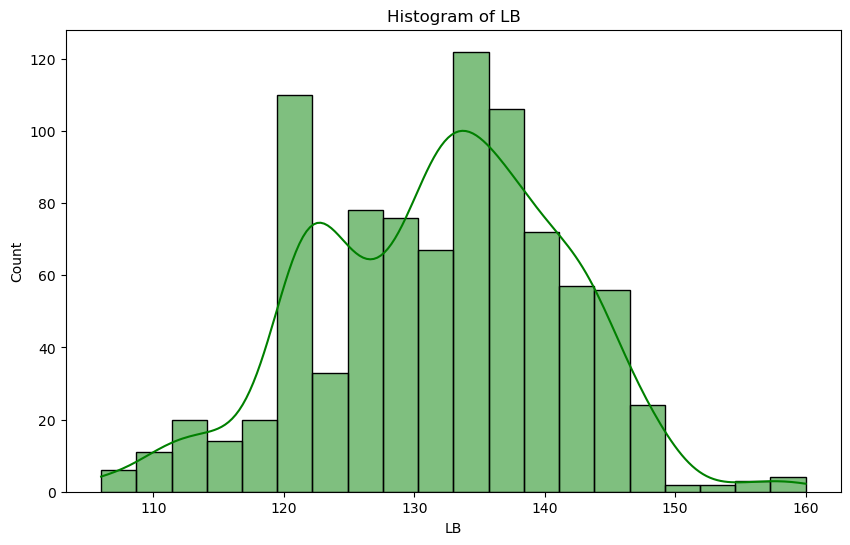

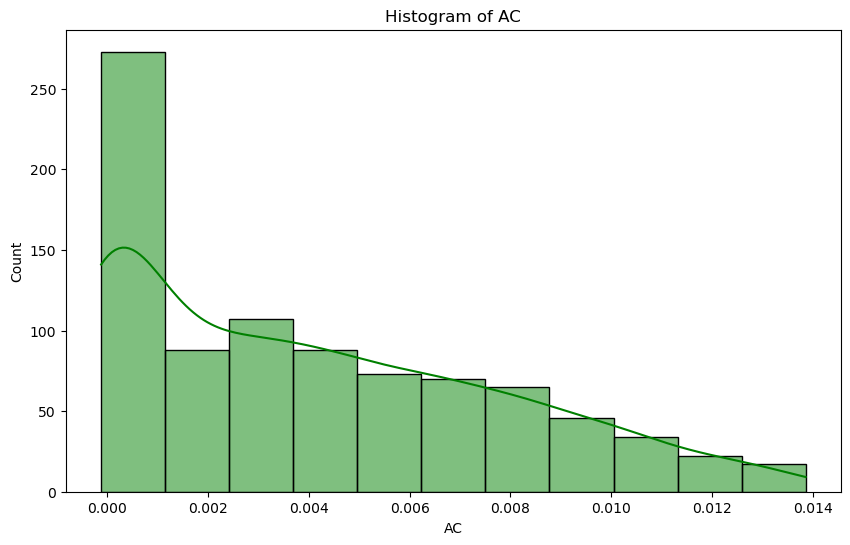

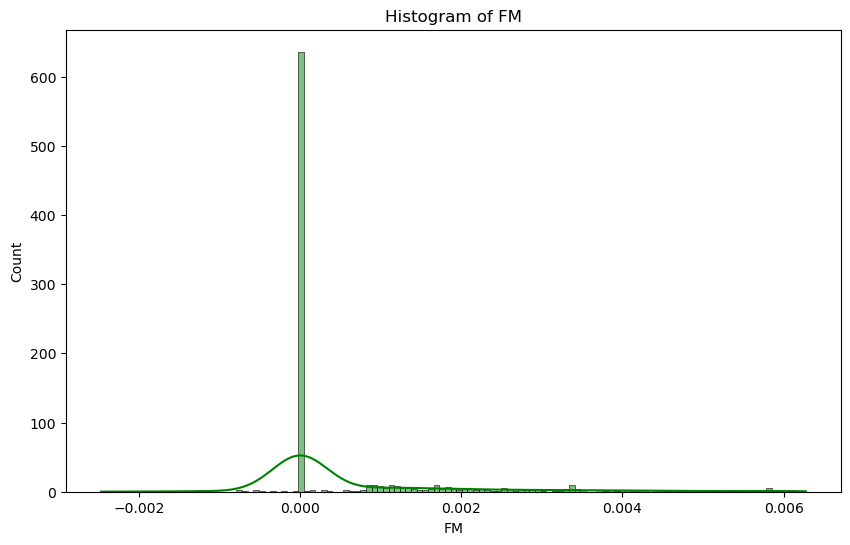

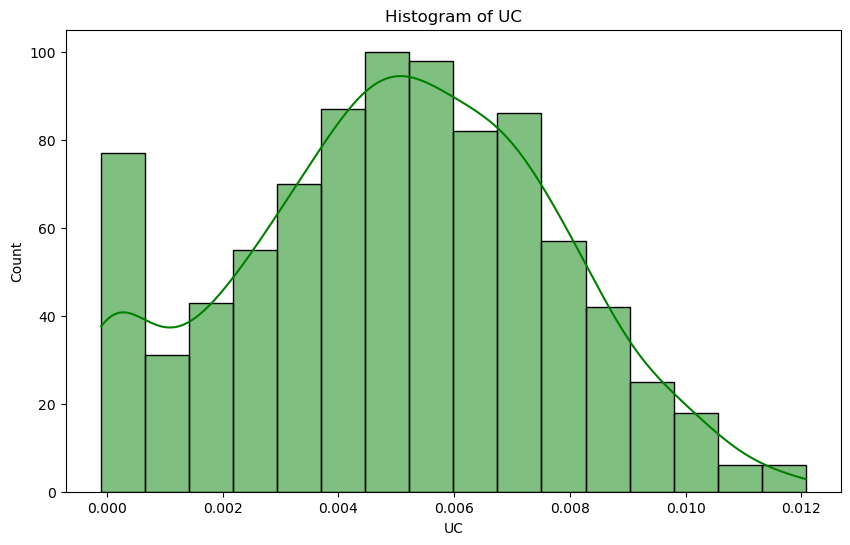

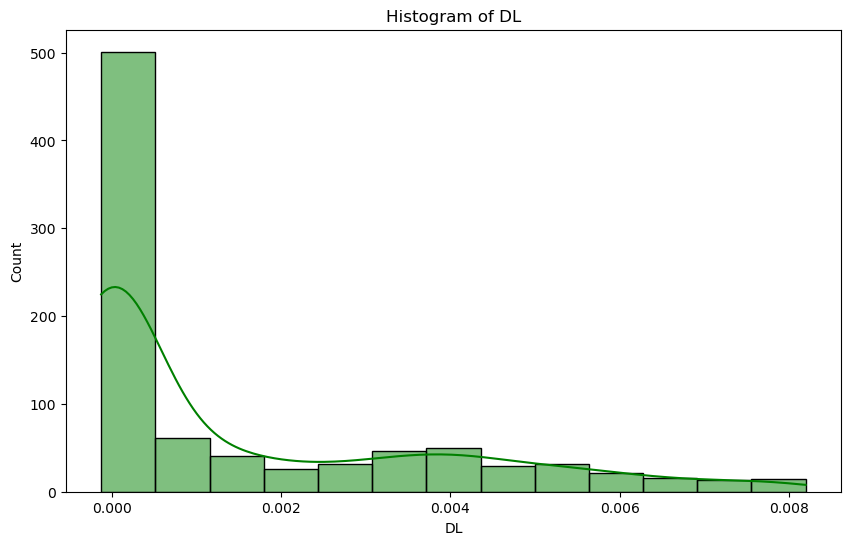

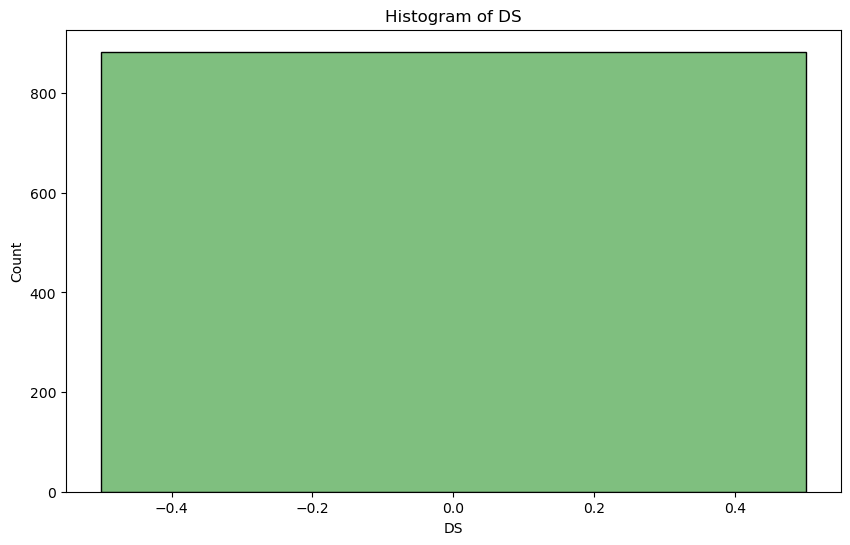

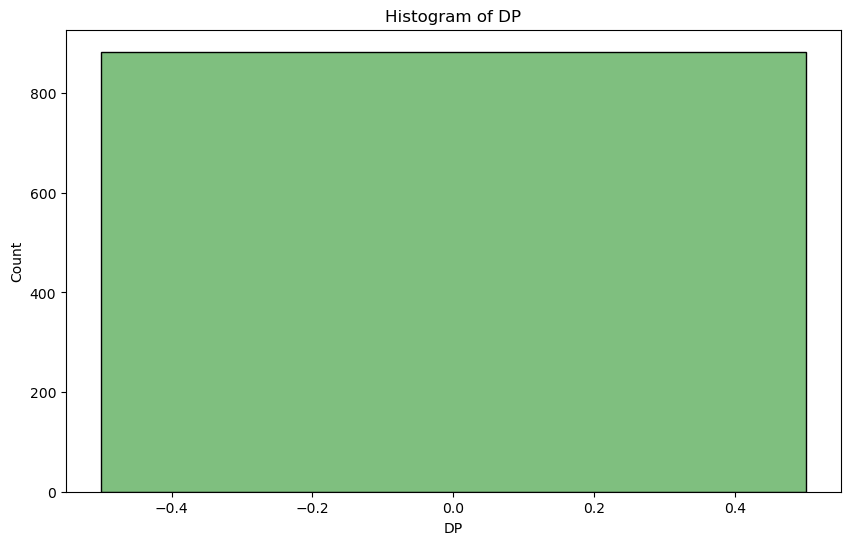

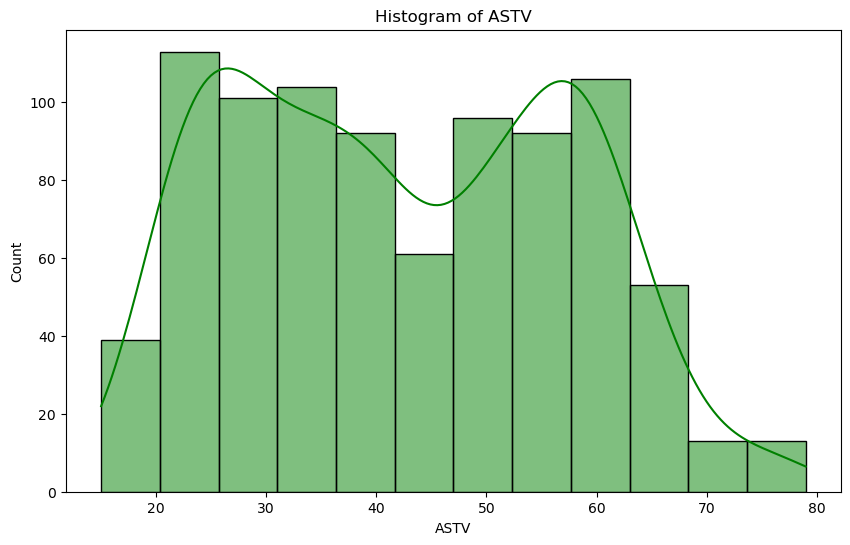

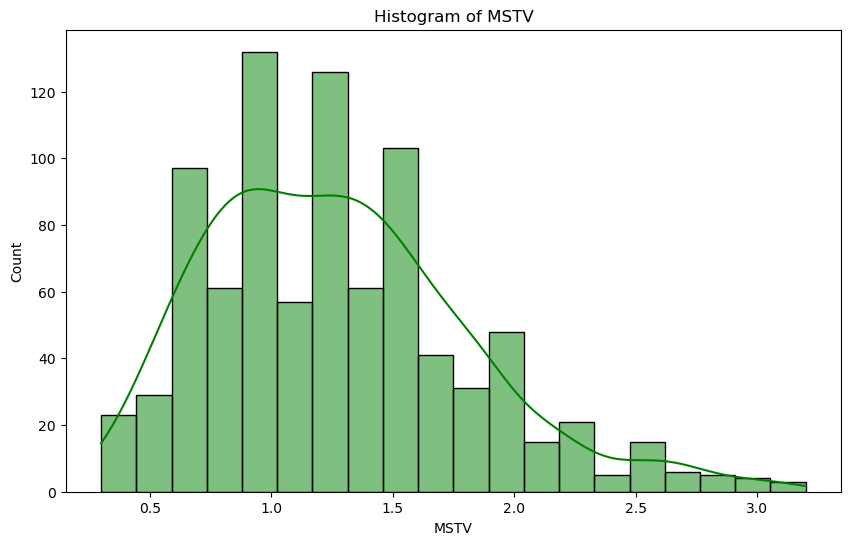

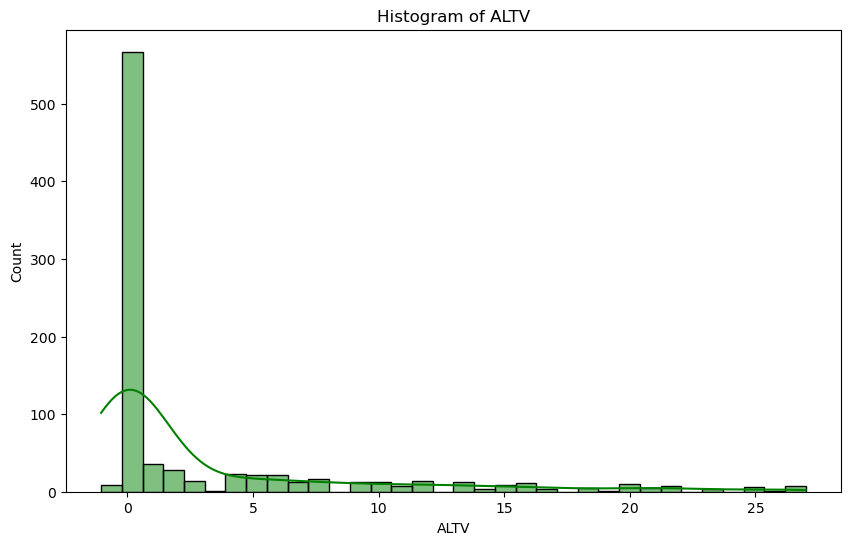

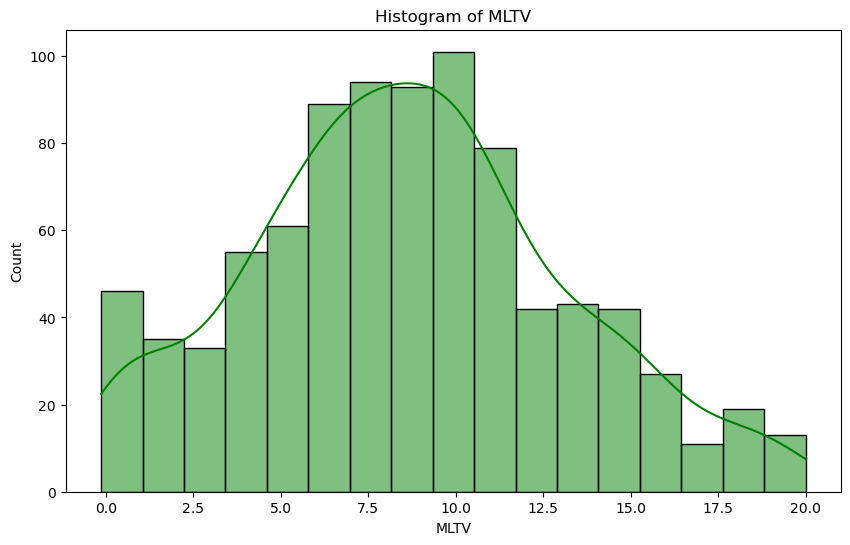

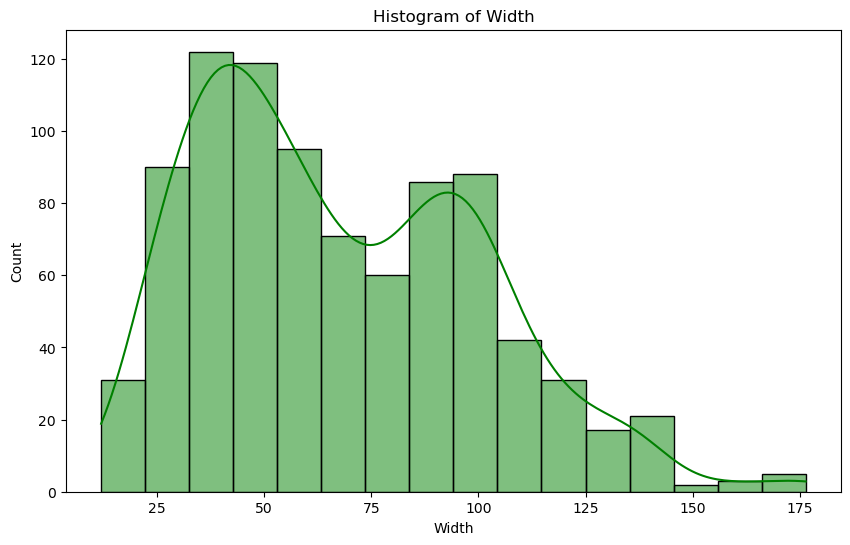

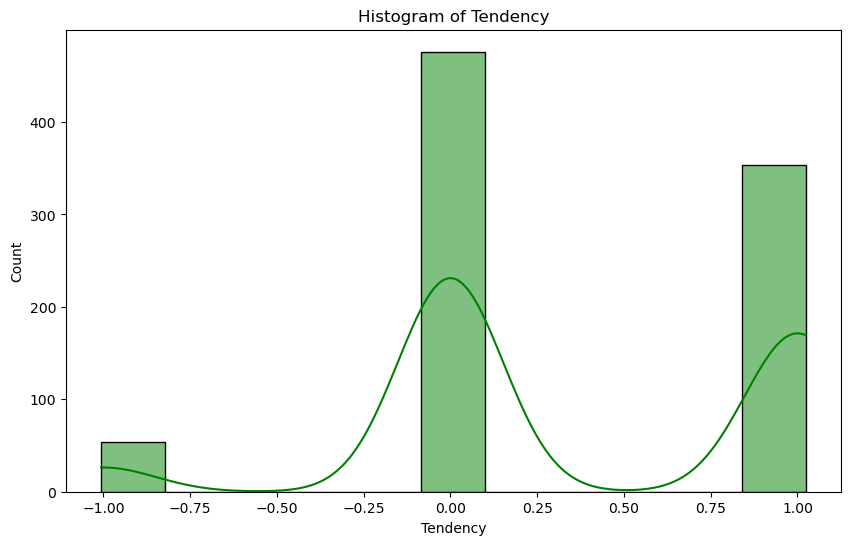

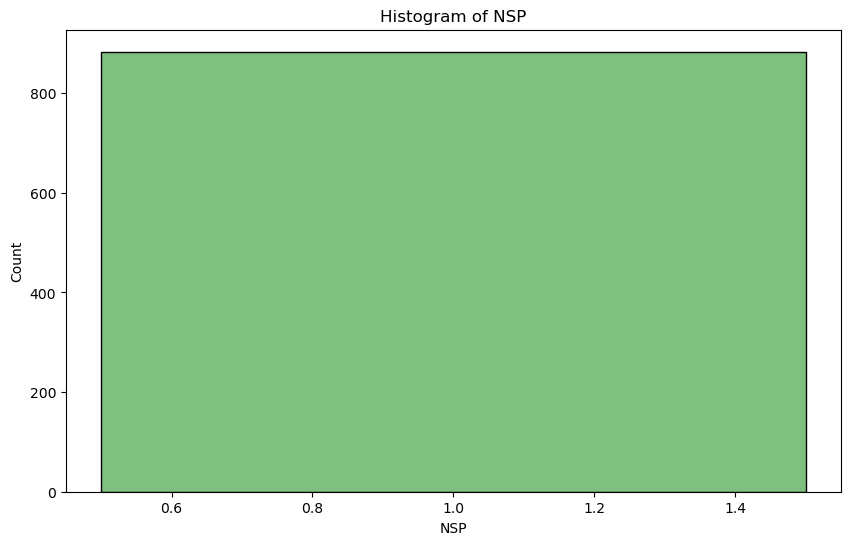

In [150]:
figg(df_no_outliers,df_no_outliers.columns)

In [166]:
# Using corr() to show correlation between all variables
df_no_outliers.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,0.079880,0.007221,-0.024043,0.020850,NaN,NaN,0.263728,-0.258983,0.124994,-0.118409,0.011791,0.315990,NaN
AC,0.079880,1.000000,0.082838,0.059763,-0.102355,NaN,NaN,0.027355,0.157814,-0.328318,-0.401056,0.282449,-0.009248,NaN
FM,0.007221,0.082838,1.000000,-0.210594,0.054073,NaN,NaN,0.362223,0.095904,-0.087823,-0.111782,0.162211,0.055835,NaN
UC,-0.024043,0.059763,-0.210594,1.000000,0.179120,NaN,NaN,-0.004439,0.108714,-0.074660,-0.103585,0.018992,-0.077725,NaN
DL,0.020850,-0.102355,0.054073,0.179120,1.000000,NaN,NaN,-0.001525,0.506833,-0.106325,-0.215279,0.540652,0.312391,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,0.263728,0.027355,0.362223,-0.004439,-0.001525,NaN,NaN,1.000000,-0.357606,0.146468,-0.331045,0.018016,0.079154,NaN
MSTV,-0.258983,0.157814,0.095904,0.108714,0.506833,NaN,NaN,-0.357606,1.000000,-0.333940,-0.006386,0.545244,0.060625,NaN
ALTV,0.124994,-0.328318,-0.087823,-0.074660,-0.106325,NaN,NaN,0.146468,-0.333940,1.000000,-0.063275,-0.216387,0.005426,NaN


**Pairplot and Heatmap to show Correlation between variables**

In [ ]:
#### Pairplot

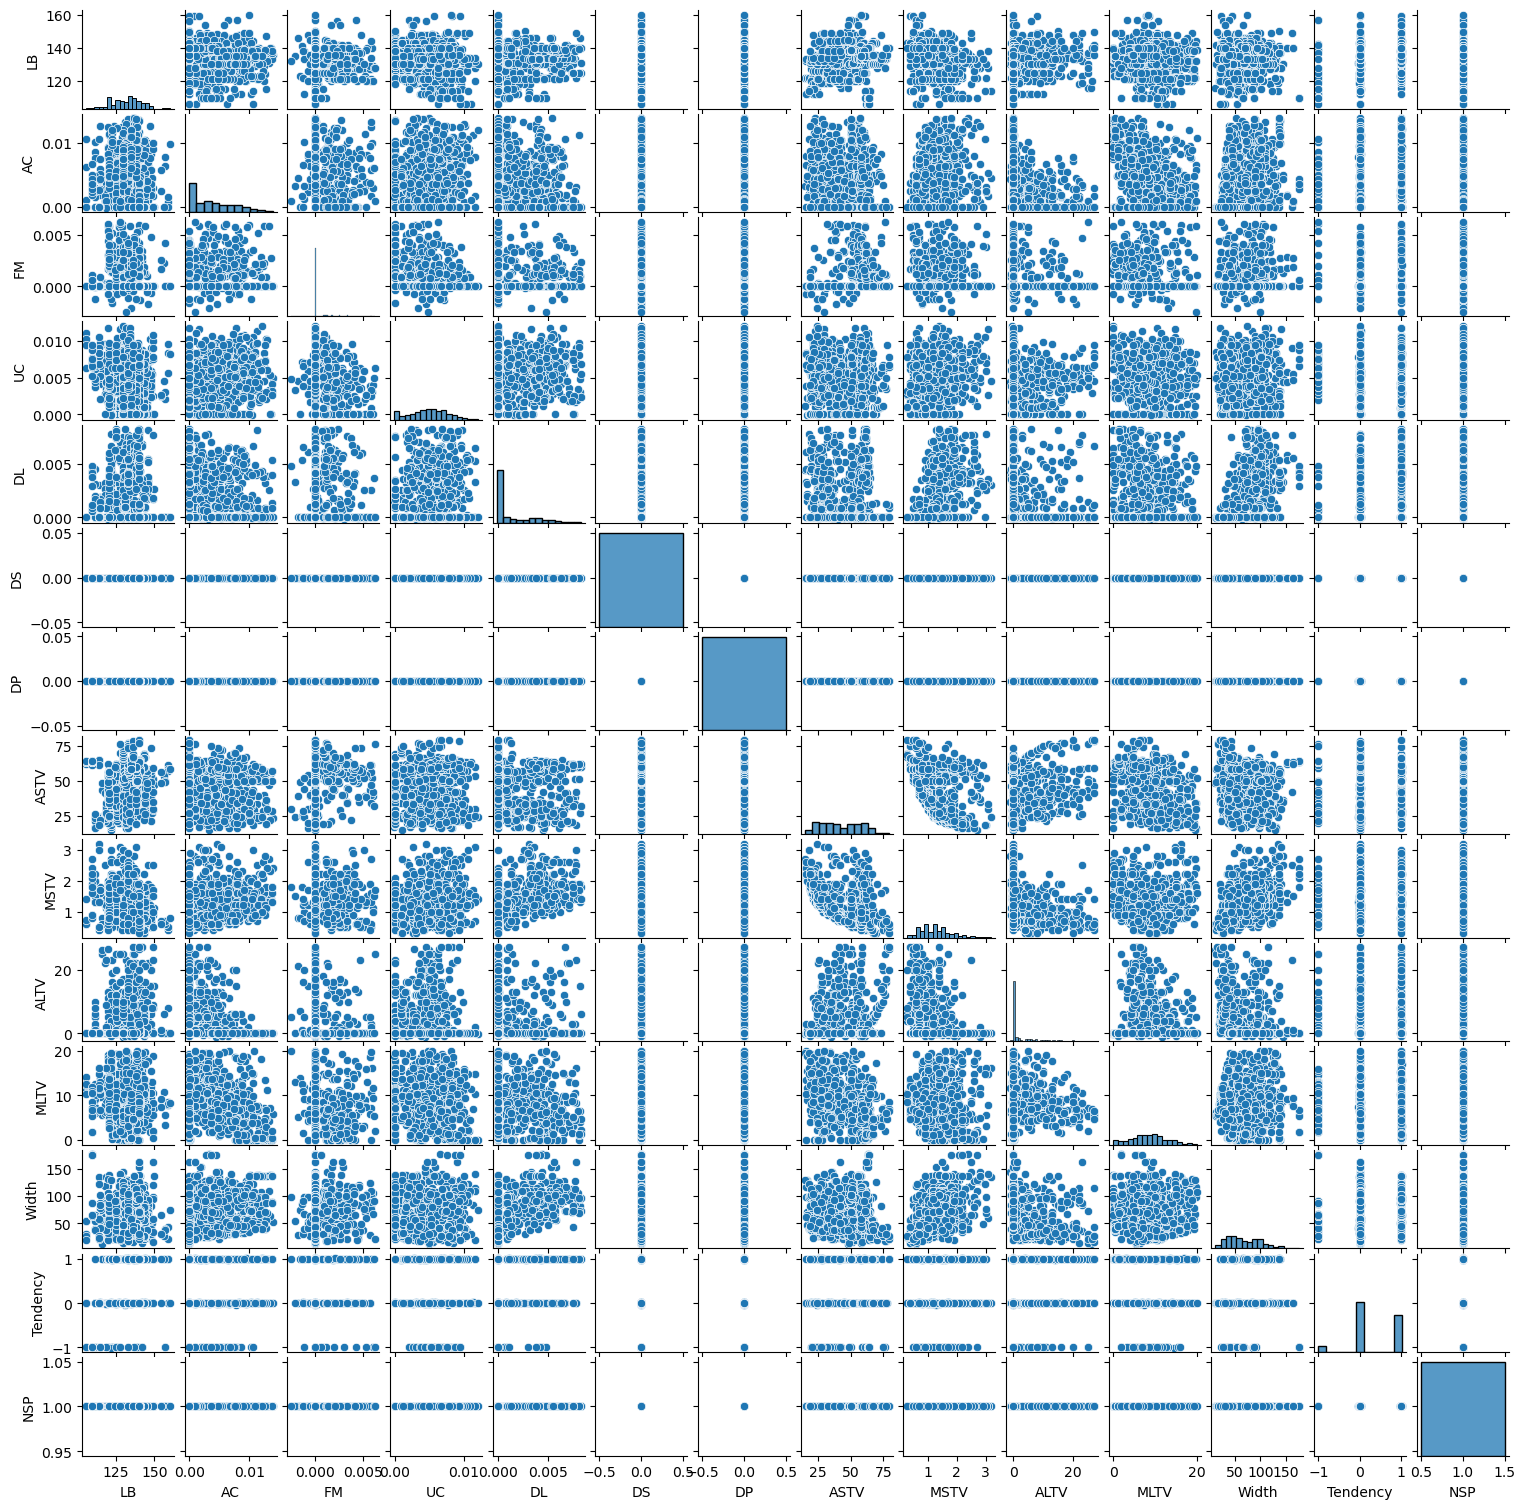

In [205]:
# Generate pairwise scatter plots using seaborn
sns.pairplot(df_no_outliers)

plt.gcf().set_size_inches(15,15)  # Adjust figure size
plt.show()

In [ ]:
# More Reliable Feature Distributions
# The histograms along the diagonal show well-distributed variables, with fewer extreme skews.
# Some features (like LB, ASTV, and Width) still show variation, which is useful for prediction.
# Others (like DS, DP, UC) remain clustered around specific values, suggesting they might not contribute much to variability.

# Clearer Feature Relationships
# The scatter plots highlight stronger trends in some feature pairs (e.g., LB & ASTV, MLT & Width).
# Removing outliers has likely improved the visibility of nonlinear patterns, making relationships clearer.

# Less Noise, Better Predictive Power
# Since outliers can distort correlations, their removal means any detected patterns (e.g., between LB & ASTV) are more trustworthy.
# Variables like NSP (a target variable) and Tendency (possibly categorical) now show cleaner separation, which can help in classification models.

#### Heatmap

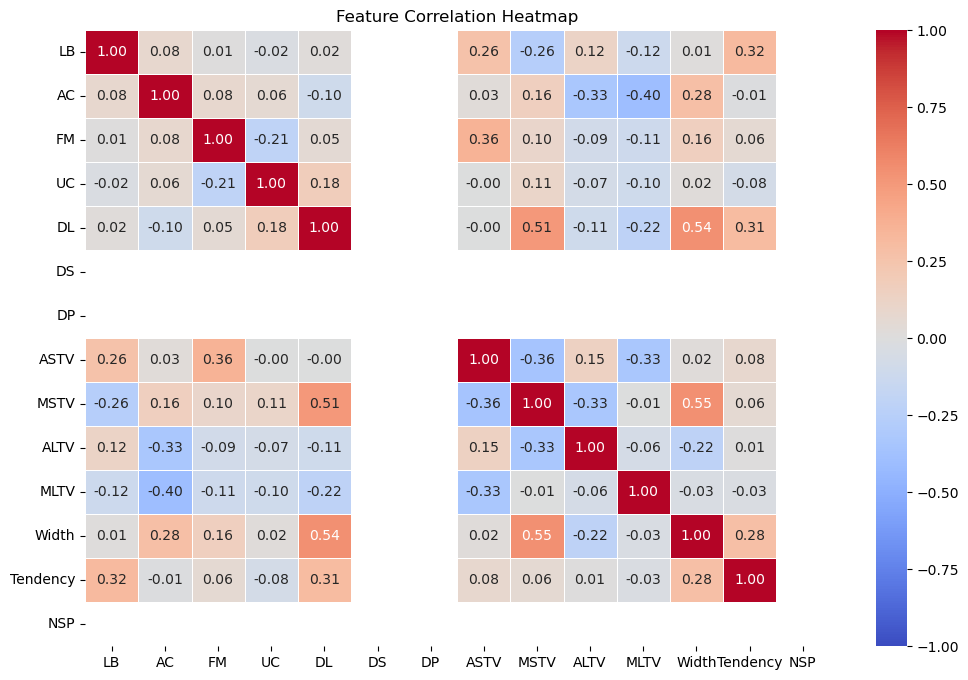

In [207]:
# Compute the correlation matrix
corr_matrix = df_no_outliers.corr()

# Set up the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

# Add a title
plt.title("Feature Correlation Heatmap")

# Show the plot
plt.show()

In [213]:
# Key Observations:
# Strong Positive Correlations:

# - DL & Width (0.54): A strong positive correlation suggests that as DL increases, Width also increases. This could mean that these two features are related in some way, potentially influencing the same underlying factor.
# - MSTV & Width (0.55): Another strong correlation that indicates these two features may be linked, possibly in signal processing or physiological measurements.
# - ASTV & FM (0.36): Suggests that ASTV and FM are moderately related.
# - MLTV & DL (-0.22): This is a weaker negative correlation but still noteworthy.

#Strong Negative Correlations:

# - ASTV & MSTV (-0.36): A strong negative correlation suggests that when ASTV increases, MSTV decreases, indicating an inverse relationship.
# - AC & ALTV (-0.33): A moderate negative correlation that may indicate these two features counterbalance each other in the dataset.

#Weak or No Correlation:

# - Some pairs, such as LB & UC (0.01) or AC & DS (-0.10), exhibit weak correlations, meaning they have little to no direct relationship.

In [215]:
# Potential Implications:
# - Strongly correlated features may be redundant, affecting feature selection in machine learning models.
# - Negative correlations might indicate compensatory mechanisms in the data.
# - These relationships help in predictive modeling by identifying important variables.

<Axes: >

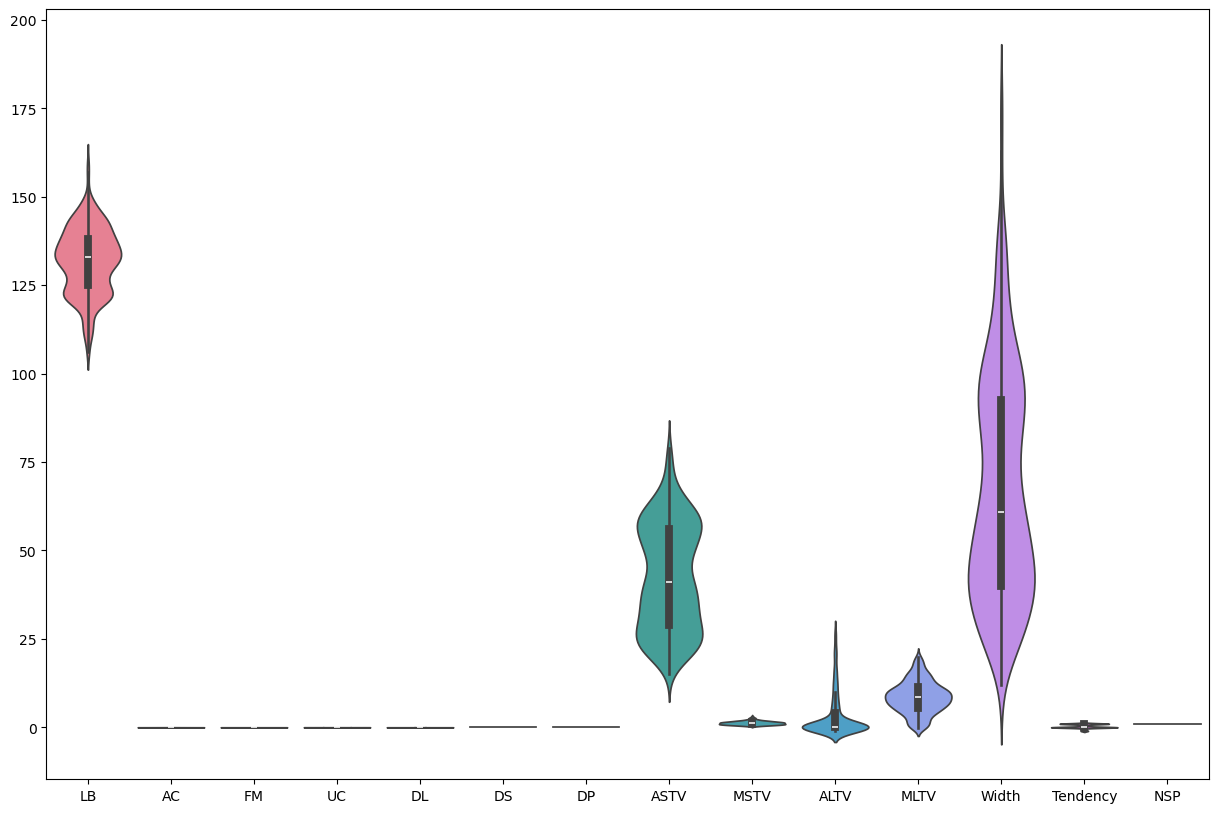

In [199]:
plt.figure(figsize = (15,10))

sns.violinplot(df_no_outliers)

In [217]:
# Insights from the Violin Plot:

# 1. **LB (Large Range, Dense Distribution)**
#    - The LB feature has a wide range (~100 to ~150), with a dense concentration around the middle values.
#    - This suggests a normal or slightly skewed distribution with most values around 125-140.

# 2. **ASTV (Moderate Spread)**
#    - ASTV shows a spread between 0 and 75, with a denser concentration towards the lower end.
#    - This indicates that most ASTV values are relatively low, but there are some higher values.

# 3. **MSTV, ALTV, and MLTV (Small Range, Skewed Distribution)**
#    - These variables have a small range, and their distributions show high density near the lower end.
#    - ALTV has a few outliers or a slight right-skew.

# 4. **Width (Extremely Wide Range)**
#    - Width has a very large spread, extending well above 150.
#    - The density is more spread out compared to other features, meaning there is significant variability in this feature.

# 5. **Tendency & NSP (Minimal Variation)**
#    - These features appear to have very small ranges, indicating little variation across the dataset.
#    - This could imply that they are categorical or binary variables.

---

Key Findings:

1. Dataset Overview & Structure:

- The dataset contains 2,126 rows and 14 columns, including features related to fetal heart rate (FHR), variability measures,

and uterine contractions.

- The column NSP (Fetal Health State Classification) is the target variable, categorizing fetal health conditions.

2. Data Cleaning & Preprocessing:

- Missing values in LB, DS, and DP were identified and handled using appropriate imputation techniques.

- Outliers were detected and treated in LB, ASTV, and MLTV using capping methods to ensure better distribution.

- The presence of negative values in some features (e.g., MLTV) was corrected, ensuring data consistency.

3. Statistical Analysis:

- Baseline FHR (LB) mean: 133 bpm, but values range from 51 to 214 bpm, suggesting significant variability.

- Short-Term Variability (ASTV) mean: 46.9%, with a wide spread indicating differences in fetal conditions.

- Decelerations (DL, DS, DP) exhibit rare occurrences but are crucial indicators of fetal distress.

4. Data Visualization Insights:

- Histograms & Boxplots: Indicate skewness and outliers in FHR-related measures, which were addressed.

- Correlation Heatmap: Strong correlations exist between variability measures and fetal health status (NSP).

- Scatterplots & Pair Plots: Show patterns between accelerations, decelerations, and heart rate variability.

5. Pattern Recognition & Key Observations:

- Higher short-term and long-term variability (ASTV, ALTV, MSTV, MLTV) correlates with abnormal fetal health states.

- Decelerations (DL, DS, DP) are closely linked to fetal distress and should be monitored carefully.

- The NSP classification can be predicted based on the variability features and FHR trends.

---

Recommendations : 
1. Predictive Model Development:

- A machine learning classification model could be developed to predict fetal health conditions based on variability features.

- Since missing values and outliers have been handled, the dataset is now suitable for training robust predictive models.

2. Further Investigations:

- Conduct time-series analysis to observe changes in fetal heart rate over time.

- Use feature engineering techniques to extract new insights from existing variables.